# **Importando pacotes**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # for split the dataset for training and testing
from sklearn.tree import DecisionTreeClassifier # for using Decision Tree Algoithm
from sklearn import metrics #for checking the model accuracy

from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.tree import export_text

# **Importando dados do CSV**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

path = "/content/drive/MyDrive/songs_normalize.csv"
df_bonus = pd.read_csv(path)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


# **Pré-processamento**

Alterando a coluna de duração, que está em milisegundos, para segundos.

In [ ]:
df["duration"] = df.duration_ms.apply(lambda x : round(x/1000))
df.drop("duration_ms", axis='columns', inplace=True)

df.head()

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,211
1,blink-182,All The Small Things,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",167
2,Faith Hill,Breathe,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",251
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",224
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,201


Vamos dar uma olhada na distribuição do atributo 'popularity'.

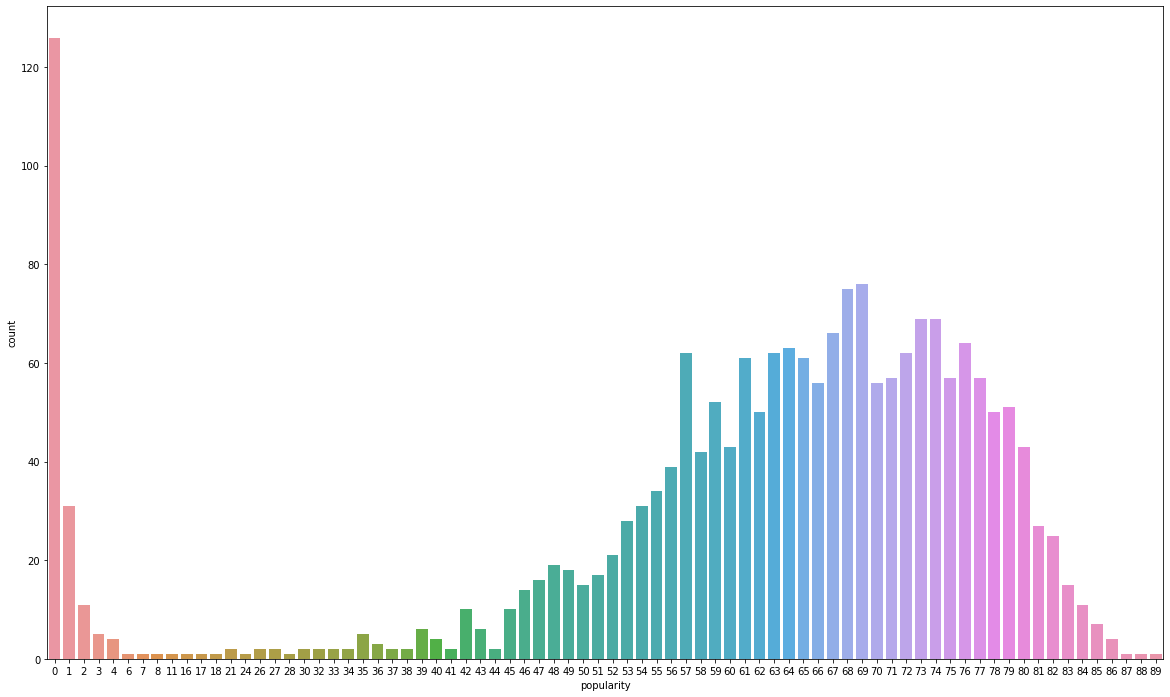

In [ ]:
ax = plt.subplots(figsize=(20, 12))
ax = sns.countplot(x=df['popularity'])

Como podemos ver no gráfico, a distribuição da popularidade não está muito bem feita. Por conta disso, vamos remover as músicas que possuem popularidade menor que 45. Com isso, ficaremos com 1758 músicas.

In [ ]:
df = df[df.popularity >= 45]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1758 non-null   object 
 1   song              1758 non-null   object 
 2   explicit          1758 non-null   bool   
 3   year              1758 non-null   int64  
 4   popularity        1758 non-null   int64  
 5   danceability      1758 non-null   float64
 6   energy            1758 non-null   float64
 7   key               1758 non-null   int64  
 8   loudness          1758 non-null   float64
 9   mode              1758 non-null   int64  
 10  speechiness       1758 non-null   float64
 11  acousticness      1758 non-null   float64
 12  instrumentalness  1758 non-null   float64
 13  liveness          1758 non-null   float64
 14  valence           1758 non-null   float64
 15  tempo             1758 non-null   float64
 16  genre             1758 non-null   object 


Nova distribuição:

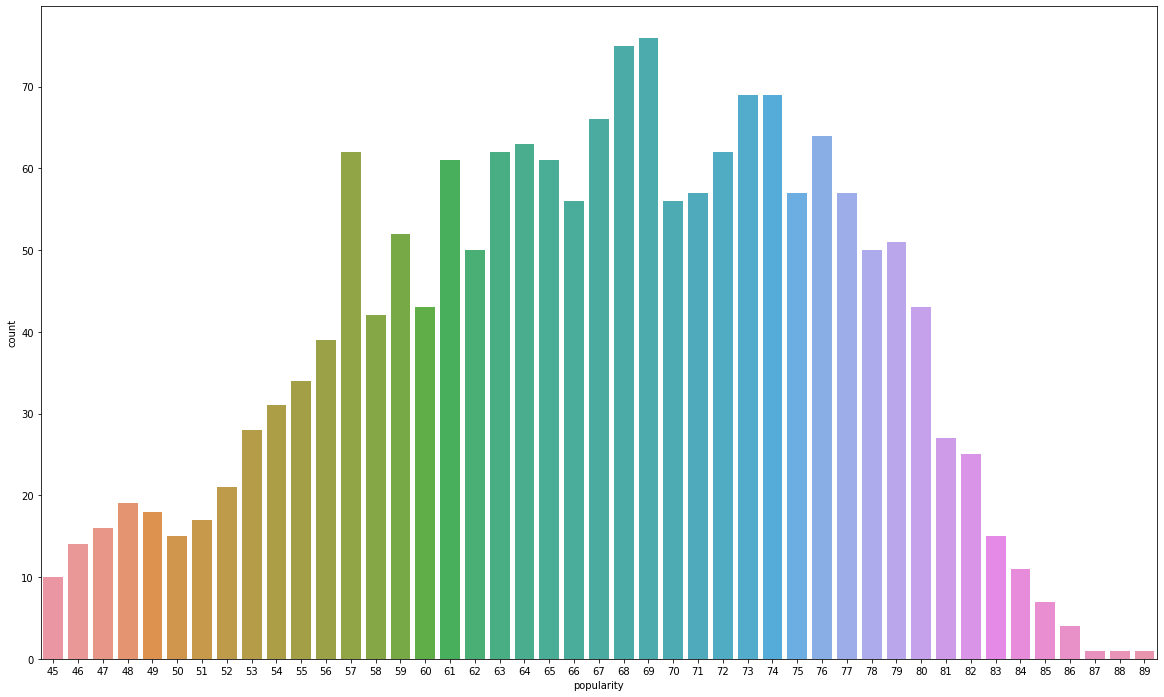

In [ ]:
ax = plt.subplots(figsize=(20, 12))
ax = sns.countplot(x=df['popularity'])

Vamos adicionar uma coluna chamada 'popularity_class', baseada na popularidade da música, que será usada para classificar a base.

In [ ]:
corte = 68
# condições da coluna de classificação
conditions = [
    (df['popularity'] >= 45) & (df['popularity'] < corte),
#     (df['popularity'] >= 57) & (df['popularity'] < 67),
    (df['popularity'] >= corte) & (df['popularity'] < 90),
#     (df['popularity'] >= 75) & (df['popularity'] < 90),
    ]

# valores da coluna de classificação
# classes = ['0', '1', '2', '3']
classes = ['boa', 'sucesso']

# criando a coluna de classificação
df['popularity_class'] = np.select(conditions, classes)

# resultado
df

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration,popularity_class
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,211,sucesso
1,blink-182,All The Small Things,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",167,sucesso
2,Faith Hill,Breathe,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",251,boa
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",224,sucesso
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,201,boa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,181,sucesso
1996,Taylor Swift,Cruel Summer,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,178,sucesso
1997,Blanco Brown,The Git Up,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",201,sucesso
1998,Sam Smith,Dancing With A Stranger (with Normani),False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,171,sucesso


Removendo as colunas que não serão usadas para classificar.

In [ ]:
y = df.popularity_class
removed_features = ['artist', 'song', 'popularity', 'genre', 'popularity_class', 'instrumentalness']
x = df.drop(removed_features, axis = 1)

# resultado
x.head()

,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
0,False,2000,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.3550,0.894,95.053,211
1,False,1999,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.6120,0.684,148.726,167
2,False,1999,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.2510,0.278,136.859,251
3,False,2000,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.3470,0.544,119.992,224
4,False,2000,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0845,0.879,172.656,201


Features que usaremos.

In [ ]:
features = x.columns

print(features)

Index(['explicit', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'duration'],
      dtype='object')


Visualizando a distribuição da popularity_class

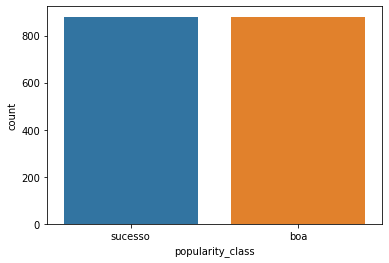

In [ ]:
ax = sns.countplot(x = y)

correlation map - podemos ver que não há nenhum atributo correlacionado então nao precisamos remover nenhum

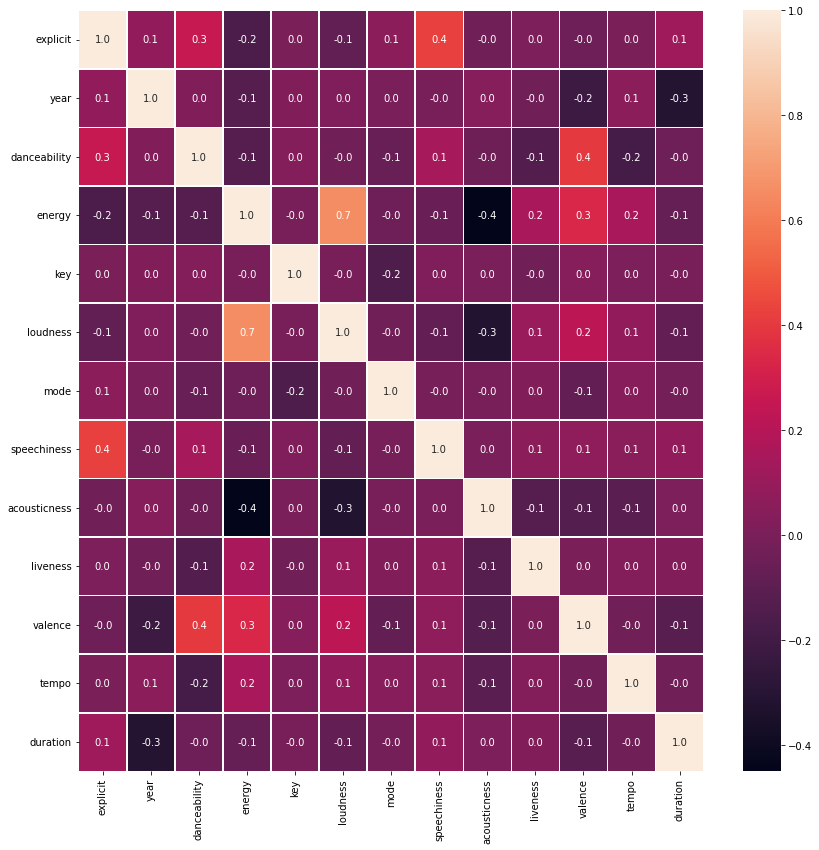

In [ ]:
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# **Metodologia**

In [ ]:
# dividindo a base em treino e teste (70-30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)

(1230, 13)
(528, 13)


Precisão do Random Forest:  0.6742424242424242


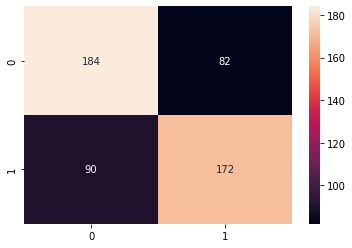

In [ ]:
# random forest
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train, y_train)
rf_prediction = clf_rf.predict(x_test)

# accuracy
rf_ac = accuracy_score(y_test, rf_prediction)
print('Precisão do Random Forest: ', rf_ac)

# matriz de confusão
rf_cm = confusion_matrix(y_test, rf_prediction)
sns.heatmap(rf_cm, annot=True, fmt="d")

# **Árvore de Decisão**

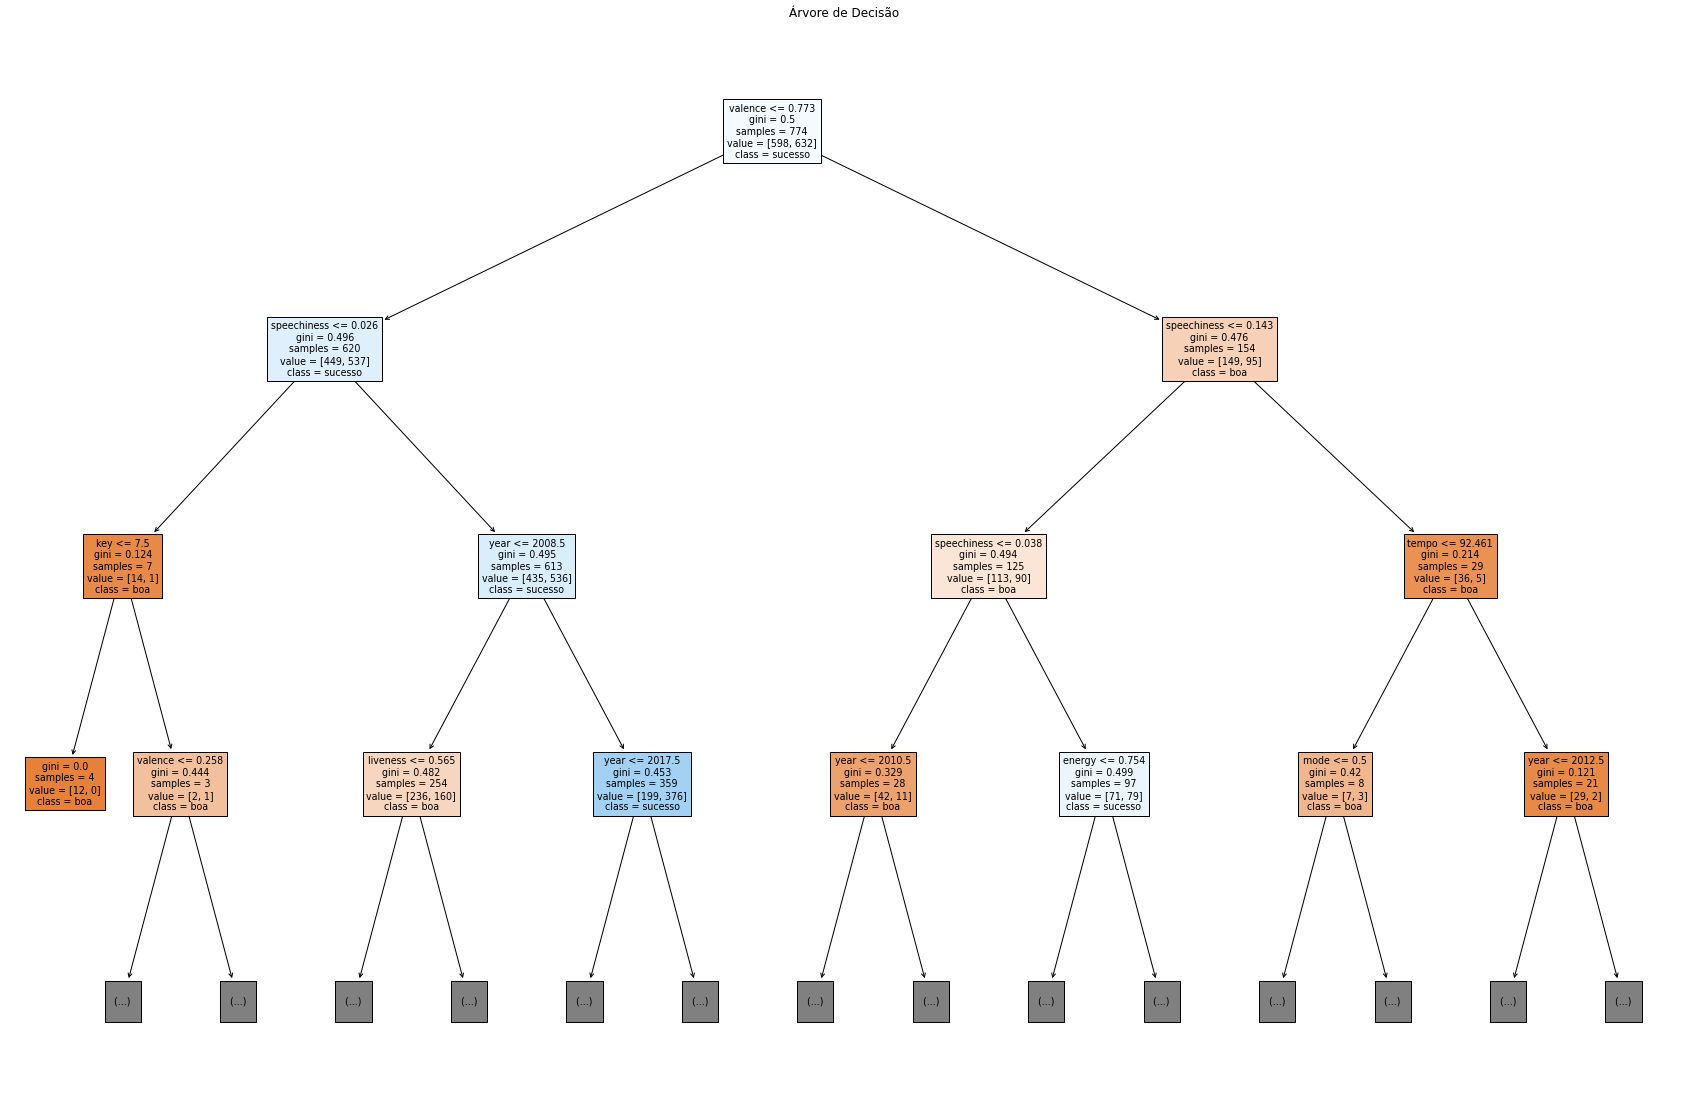

|--- valence <= 0.77
|   |--- speechiness <= 0.03
|   |   |--- key <= 7.50
|   |   |   |--- weights: [12.00, 0.00] class: 0.0
|   |   |--- key >  7.50
|   |   |   |--- valence <= 0.26
|   |   |   |   |--- weights: [0.00, 1.00] class: 1.0
|   |   |   |--- valence >  0.26
|   |   |   |   |--- weights: [2.00, 0.00] class: 0.0
|   |--- speechiness >  0.03
|   |   |--- year <= 2008.50
|   |   |   |--- liveness <= 0.56
|   |   |   |   |--- valence <= 0.70
|   |   |   |   |   |--- danceability <= 0.68
|   |   |   |   |   |   |--- key <= 8.50
|   |   |   |   |   |   |   |--- danceability <= 0.66
|   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |--- danceability >  0.66
|   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |--- key >  8.50
|   |   |   |   |   |   |   |--- danceability <= 0.36
|   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |--- danceability >  0.36
|   | 

In [ ]:
# selecionando uma das árvores do random forest
estimator = clf_rf.estimators_[5]

plt.figure(figsize=(30, 20))
plot_tree(estimator, max_depth=3, feature_names=features, class_names=classes, filled=True)
plt.title("Árvore de Decisão")
plt.show()

tree_rules = export_text(estimator, feature_names=list(features), max_depth=7, show_weights=True)
print(tree_rules)